In [ ]:
import os

# Set the path to the directory where we want to create the subdirectories
dir_path = "/tmp/images"

# Create the subdirectories
os.makedirs(os.path.join(dir_path, "sunflowers"))
os.makedirs(os.path.join(dir_path, "tulips"))

In [ ]:
pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bing_image_downloader import downloader

# Set the directory paths for the subdirectories
parent_dir = "/tmp/images"
sunflowers_dir = os.path.join(parent_dir, "sunflowers")
tulips_dir = os.path.join(parent_dir, "tulips")

# Define the search terms for sunflowers and tulips photos
sunflowers_query = "sunflowers"
tulips_query = "tulips"

# Download 50 sunflowers photos and save them to the sunflowers directory
downloader.download(sunflowers_query, limit=100, output_dir=sunflowers_dir, adult_filter_off=True, force_replace=False)

# Download 50 tulips photos and save them to the tulips directory
downloader.download(tulips_query, limit=100, output_dir=tulips_dir, adult_filter_off=True, force_replace=False)

In [ ]:
# Set the path to the parent directory where we want to create the subdirectories
parent_dir = "/tmp"

# Create the subdirectories
os.makedirs(os.path.join(parent_dir, "training"))
os.makedirs(os.path.join(parent_dir, "validation"))

In [ ]:
import os
import random
import shutil

# Set the paths to the input and output directories
input_dir_sunflowers = "/tmp/images/sunflowers/sunflowers"
input_dir_tulips = "/tmp/images/tulips/tulips"
output_dir_training = "/tmp/training"
output_dir_validation = "/tmp/validation"

# Set the split ratio
split_ratio = 0.8

# Create the output directories
os.makedirs(os.path.join(output_dir_training, "sunflowers"))
os.makedirs(os.path.join(output_dir_training, "tulips"))
os.makedirs(os.path.join(output_dir_validation, "sunflowers"))
os.makedirs(os.path.join(output_dir_validation, "tulips"))

# Split the sunflowers photos into the training and validation directories
sunflowers_files = os.listdir(input_dir_sunflowers)
num_sunflowers = len(sunflowers_files)
num_sunflowers_train = int(num_sunflowers * split_ratio)
num_sunflowers_val = num_sunflowers - num_sunflowers_train
random.shuffle(sunflowers_files)
for i in range(num_sunflowers_train):
    src_path = os.path.join(input_dir_sunflowers, sunflowers_files[i])
    dst_path = os.path.join(output_dir_training, "sunflowers", sunflowers_files[i])
    shutil.copy(src_path, dst_path)
for i in range(num_sunflowers_train, num_sunflowers):
    src_path = os.path.join(input_dir_sunflowers, sunflowers_files[i])
    dst_path = os.path.join(output_dir_validation, "sunflowers", sunflowers_files[i])
    shutil.copy(src_path, dst_path)

# Split the tulips photos into the training and validation directories
tulips_files = os.listdir(input_dir_tulips)
num_tulips = len(tulips_files)
num_tulips_train = int(num_tulips * split_ratio)
num_tulips_val = num_tulips - num_tulips_train
random.shuffle(tulips_files)
for i in range(num_tulips_train):
    src_path = os.path.join(input_dir_tulips, tulips_files[i])
    dst_path = os.path.join(output_dir_training, "tulips", tulips_files[i])
    shutil.copy(src_path, dst_path)
for i in range(num_tulips_train, num_tulips):
    src_path = os.path.join(input_dir_tulips, tulips_files[i])
    dst_path = os.path.join(output_dir_validation, "tulips", tulips_files[i])
    shutil.copy(src_path, dst_path)

In [ ]:
import numpy as np
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/tmp/training'
val_dir = '/tmp/validation'


train_datagen = ImageDataGenerator(rescale= 1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale= 1./255)

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')


Found 159 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 

    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    #tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2), 
    
    tf.keras.layers.Dense(1024, activation='relu'), 

    tf.keras.layers.Dense(2, activation='softmax')  
])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

history= model.fit(
            train_generator,
            epochs=15,
            validation_data=val_generator,
            verbose=2
            )

Epoch 1/15
5/5 - 14s - loss: 2.1585 - accuracy: 0.3962 - val_loss: 0.5163 - val_accuracy: 0.9250 - 14s/epoch - 3s/step
Epoch 2/15
5/5 - 9s - loss: 0.5048 - accuracy: 0.7925 - val_loss: 0.3766 - val_accuracy: 0.9250 - 9s/epoch - 2s/step
Epoch 3/15
5/5 - 8s - loss: 0.3737 - accuracy: 0.8553 - val_loss: 0.2879 - val_accuracy: 0.9000 - 8s/epoch - 2s/step
Epoch 4/15
5/5 - 9s - loss: 0.3282 - accuracy: 0.8679 - val_loss: 0.2583 - val_accuracy: 0.9000 - 9s/epoch - 2s/step
Epoch 5/15
5/5 - 10s - loss: 0.2988 - accuracy: 0.8931 - val_loss: 0.2208 - val_accuracy: 0.9250 - 10s/epoch - 2s/step
Epoch 6/15
5/5 - 10s - loss: 0.2704 - accuracy: 0.8994 - val_loss: 0.2074 - val_accuracy: 0.9250 - 10s/epoch - 2s/step
Epoch 7/15
5/5 - 8s - loss: 0.2259 - accuracy: 0.9434 - val_loss: 0.2223 - val_accuracy: 0.9000 - 8s/epoch - 2s/step
Epoch 8/15
5/5 - 9s - loss: 0.2476 - accuracy: 0.9119 - val_loss: 0.2024 - val_accuracy: 0.9250 - 9s/epoch - 2s/step
Epoch 9/15
5/5 - 9s - loss: 0.2265 - accuracy: 0.9497 - va

Text(0.5, 1.0, 'Training and validation loss')

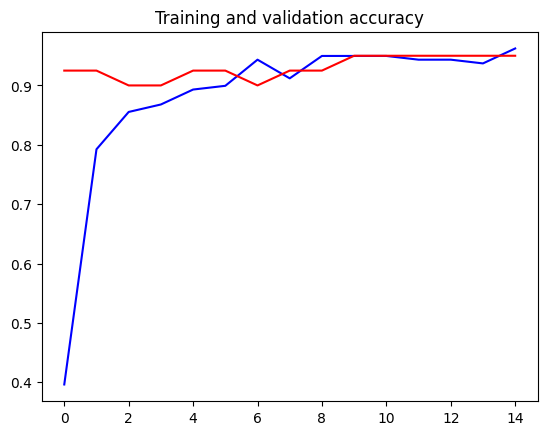

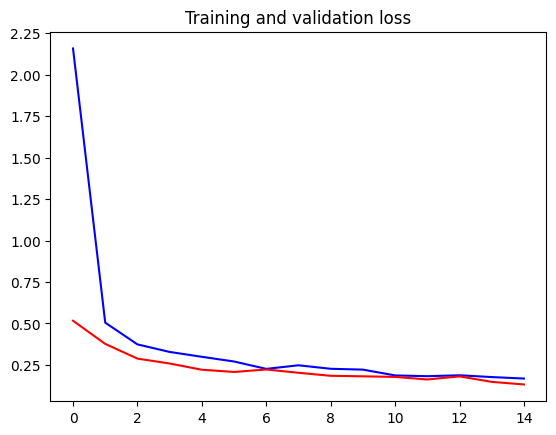

In [ ]:
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc ,color = 'b')
plt.plot  ( epochs, val_acc,color = 'r' )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss,color = 'b' )
plt.plot  ( epochs, val_loss ,color = 'r')
plt.title ('Training and validation loss'   )

In [ ]:
import tensorflow as tf
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

# Define the class labels
class_labels = ['sunflower', 'tulip']

# Upload the image to Google Colab
uploaded = files.upload()

# Get the file name of the uploaded image
for fn in uploaded.keys():
  # Load the image file
  img = image.load_img(fn, target_size=(150, 150))
  # Convert the image to a numpy array
  img_array = image.img_to_array(img)
  # Reshape the array to match the input shape of the model
  img_array = np.expand_dims(img_array, axis=0)

  # Normalize the image data
  img_array /= 255.0

  # Make a prediction using the pre-trained model
  predictions = model.predict(img_array)

  # Get the predicted class label
  predicted_class = class_labels[np.argmax(predictions)]

  # Print the predicted class label
  print('The uploaded image is a', predicted_class)

Saving tulips-planting-and-growing-tulips-1402137-06-5c18a69c82114b16bc8eb3baf69935e3.jpg to tulips-planting-and-growing-tulips-1402137-06-5c18a69c82114b16bc8eb3baf69935e3 (2).jpg
1/1 [==============================] - 0s 185ms/step
The uploaded image is a tulip
